In [13]:
import pandas as pd
from datetime import date
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

In [14]:
df = pd.read_csv('data/bfro_reports_geocoded.csv')

In [15]:
df.head()

,index,observed,location_details,county,state,season,title,latitude,longitude,date,...,moon_phase,precip_intensity,precip_probability,precip_type,pressure,summary,uv_index,visibility,wind_bearing,wind_speed
0,0,I was canoeing on the Sipsey river in Alabama....,NaN,Winston County,Alabama,Summer,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Ed L. was salmon fishing with a companion in P...,East side of Prince William Sound,Valdez-Chitina-Whittier County,Alaska,Fall,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,"While attending U.R.I in the Fall of 1974,I wo...","Great swamp area, Narragansett Indians",Washington County,Rhode Island,Fall,Report 6496: Bicycling student has night encou...,41.45,-71.5,1974-09-20,...,0.16,0.0,0.0,NaN,1020.61,Foggy until afternoon.,4.0,2.75,198.0,6.92
3,3,"Hello, My name is Doug and though I am very re...",I would rather not have exact location (listin...,York County,Pennsylvania,Summer,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,It was May 1984. Two friends and I were up in ...,"Logging roads north west of Yamhill, OR, about...",Yamhill County,Oregon,Spring,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
def get_statistics(df, feature):
  df.dropna(subset=[feature], inplace=True)

  mean = df['temperature_mid'].agg('mean')
  mean.plot()
  plt.show()
  return df

get_statistics(df,'date')

,index,observed,location_details,county,state,season,title,latitude,longitude,date,...,moon_phase,precip_intensity,precip_probability,precip_type,pressure,summary,uv_index,visibility,wind_bearing,wind_speed
2,2,"While attending U.R.I in the Fall of 1974,I wo...","Great swamp area, Narragansett Indians",Washington County,Rhode Island,Fall,Report 6496: Bicycling student has night encou...,41.45000,-71.50000,1974-09-20,...,0.16,0.0000,0.0,NaN,1020.61,Foggy until afternoon.,4.0,2.750,198.0,6.92
5,5,My two children and I were returning from Altu...,The creature crossed from one cattle pasture t...,Washita County,Oklahoma,Fall,Report 9765: Motorist and children have daylig...,35.30110,-99.17020,1973-09-28,...,0.07,NaN,NaN,rain,1017.26,Partly cloudy starting in the afternoon.,7.0,10.000,259.0,8.41
6,6,I was staying the night with a friends of mine...,"Vincent, Ohio (In theWayne National Forest)",Washington County,Ohio,Summer,Report 4983: Sighting and vocalizations at a h...,39.38745,-81.67339,1971-08-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,Well last year I was night fishing 9/2010 at A...,Both sightings were on the North east corner o...,Westchester County,New York,Fall,Report 31940: Fishermen and Law Enforcement Of...,41.29873,-73.73717,2010-09-01,...,0.76,0.0000,0.0,NaN,1016.80,Clear throughout the day.,8.0,6.922,219.0,1.01
8,8,I grew up in Northwestern Nevada along the Cal...,"The Western face of Peavine Mountain, Northwes...",Washoe County,Nevada,Fall,Report 5692: Father and son hear vocalizations...,39.59200,-119.97500,1970-09-01,...,0.02,0.0000,0.0,NaN,1012.31,Clear throughout the day.,8.0,8.880,285.0,4.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5010,5010,In October 2008 we went on a 4 wheeler trip to...,Follow the railroad tracks East out of town an...,Harlan County,Kentucky,Fall,Report 25257: ATV riders find possible tracks ...,36.89771,-83.16293,2008-10-15,...,0.53,0.0000,0.0,NaN,NaN,Clear throughout the day.,0.0,NaN,168.0,0.77
5011,5011,Went to get trail cams and see dark black figu...,NaN,Harlan County,Kentucky,Winter,Report 38980: Teen on four-wheeler has sightin...,36.83193,-83.42429,2013-01-10,...,0.96,0.0000,0.0,NaN,NaN,Foggy in the morning.,2.0,6.830,105.0,1.19
5012,5012,The appearance of the thing was just as I have...,On Bods Mill Rd. there is a hidden entrance to...,Anderson County,Kentucky,Fall,Report 1045: Father and son have a daylight en...,37.95708,-84.97527,2005-01-09,...,0.97,0.0000,0.0,NaN,1024.94,Overcast in the morning.,2.0,9.760,191.0,6.20
5013,5013,"OK, let me start by saying I have always been ...",Removed at witness' request.,Anderson County,Kentucky,Fall,Report 33187: Dual sighting in late afternoon ...,37.97699,-84.90234,2011-11-15,...,0.65,0.0348,1.0,rain,1011.58,Rain until evening.,2.0,8.950,190.0,3.50


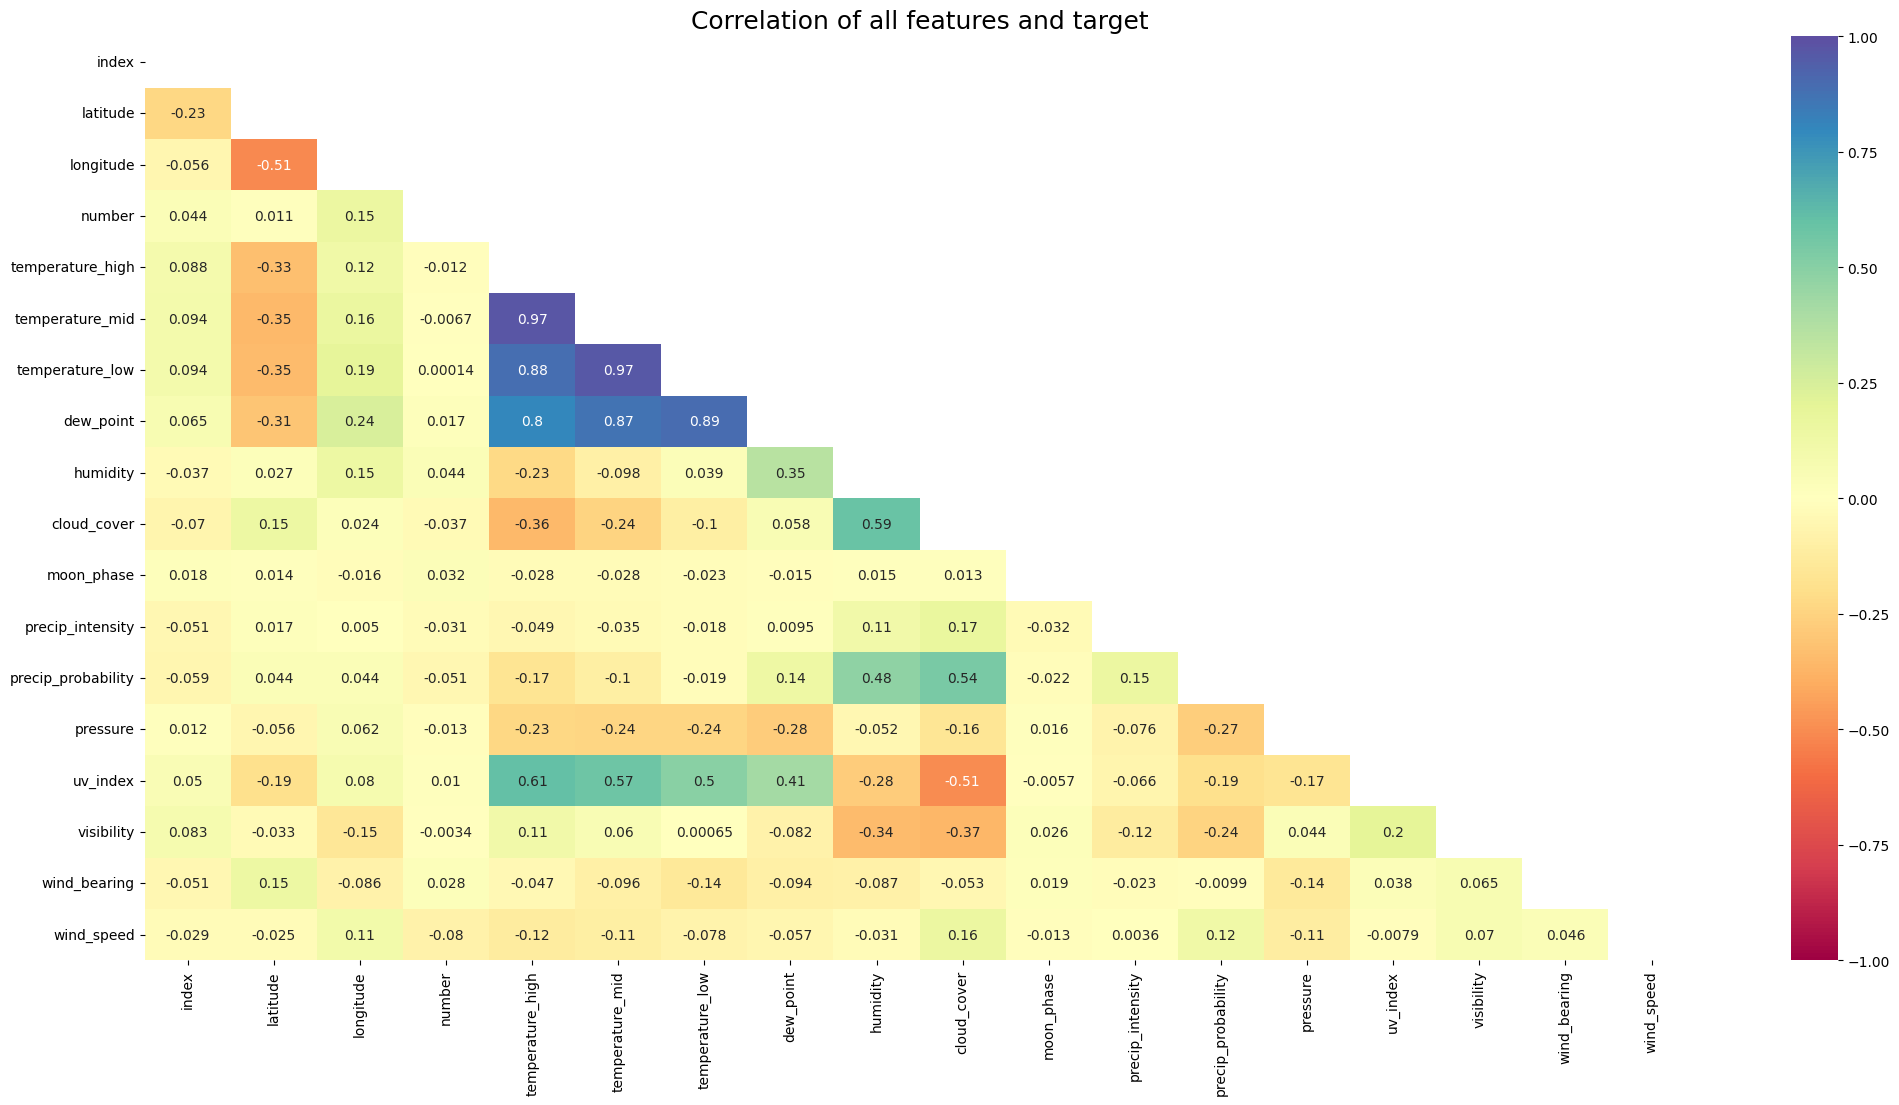

In [17]:
plt.figure(figsize = (25,12))

corr = df.corr(numeric_only = True)
upper_triangle = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr,vmin = -1, vmax = 1, cmap = "Spectral", annot = True, mask = upper_triangle)
plt.title("Correlation of all features and target", fontsize= 18)
plt.show()